<a href="https://colab.research.google.com/github/anjuunni/Sample/blob/main/TimeSeries_Exchange.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importing necessary modules


In [1]:
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
import seaborn as sns
sns.set()

In [4]:
import numpy as np

In [5]:
from pandas.plotting import scatter_matrix

In [6]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [7]:
from statsmodels.tsa.arima_model import ARIMA

In [8]:
from sklearn import preprocessing

##Understanding Data

In [9]:
EURUSD=pd.read_csv('EURUSD_historical_data.csv',header=0,parse_dates=True)
EURJPY=pd.read_csv('EURJPY_historical_data.csv',header=0,parse_dates=True)
USDJPY=pd.read_csv('USDJPY_historical_data.csv',header=0,parse_dates=True)

In [10]:
EURUSD.head()

,Date,Open,High,Low,Close,Change(Pips),Change(%)
0,07/09/2021 0:00,1.18466,1.18494,1.18449,1.18473,0.7,0.01
1,07/08/2021 23:45,1.18471,1.18478,1.18459,1.18463,-0.8,-0.01
2,07/08/2021 23:30,1.18438,1.18478,1.18436,1.18471,3.3,0.03
3,07/08/2021 23:15,1.18422,1.18426,1.18406,1.18426,0.4,0.00
4,07/08/2021 23:00,1.18454,1.18464,1.18415,1.18424,-3.0,-0.03


In [11]:
EURJPY.head()

,Date,Open,High,Low,Close,Change(Pips),Change(%)
0,07/09/2021 0:00,130.077,130.175,130.046,130.125,4.8,0.04
1,07/08/2021 23:45,130.112,130.130,130.050,130.077,-3.5,-0.03
2,07/08/2021 23:30,130.073,130.130,130.072,130.113,4.0,0.03
3,07/08/2021 23:15,130.050,130.058,130.035,130.047,-0.3,0.00
4,07/08/2021 23:00,130.040,130.063,130.033,130.051,1.1,0.01


In [12]:
EURJPY.describe()

,Open,High,Low,Close,Change(Pips),Change(%)
count,385.000000,385.000000,385.000000,385.000000,385.000000,385.000000
mean,130.889421,130.921003,130.850584,130.885623,-0.379740,-0.002779
std,0.623335,0.616694,0.633185,0.622749,4.750187,0.036412
min,129.698000,129.783000,129.625000,129.700000,-23.000000,-0.170000
25%,130.417000,130.455000,130.381000,130.415000,-3.000000,-0.020000
50%,130.809000,130.834000,130.772000,130.807000,0.000000,0.000000
75%,131.603000,131.622000,131.581000,131.603000,1.800000,0.010000
max,131.836000,131.863000,131.812000,131.837000,20.100000,0.150000


In [13]:
EURUSD.describe()

,Open,High,Low,Close,Change(Pips),Change(%)
count,385.000000,385.000000,385.000000,385.000000,385.000000,385.000000
mean,1.183648,1.183909,1.183360,1.183646,-0.013247,-0.000182
std,0.002671,0.002663,0.002687,0.002669,3.986214,0.033961
min,1.178480,1.178770,1.178150,1.178470,-17.800000,-0.150000
25%,1.181950,1.182170,1.181600,1.181980,-1.900000,-0.020000
50%,1.183840,1.184090,1.183610,1.183830,0.000000,0.000000
75%,1.186060,1.186390,1.185860,1.186080,2.100000,0.020000
max,1.189350,1.189540,1.189020,1.189390,16.400000,0.140000


In [14]:
USDJPY.describe()

,Open,High,Low,Close,Change(Pips),Change(%)
count,385.000000,385.000000,385.000000,385.000000,385.000000,385.000000
mean,110.580343,110.603561,110.553306,110.577013,-0.332987,-0.003039
std,0.406147,0.401732,0.412936,0.407037,3.696173,0.033694
min,109.569000,109.602000,109.535000,109.567000,-17.300000,-0.160000
25%,110.538000,110.562000,110.511000,110.532000,-2.000000,-0.020000
50%,110.654000,110.677000,110.633000,110.653000,-0.100000,0.000000
75%,110.850000,110.874000,110.833000,110.851000,1.600000,0.010000
max,111.165000,111.190000,111.151000,111.165000,12.400000,0.110000


In [15]:
EURJPY.columns,EURUSD.columns,USDJPY.columns

(Index(['Date', 'Open', 'High', 'Low', 'Close', 'Change(Pips)', 'Change(%)'], dtype='object'),
 Index(['Date', 'Open', 'High', 'Low', 'Close', 'Change(Pips)', 'Change(%)'], dtype='object'),
 Index(['Date', 'Open', 'High', 'Low', 'Close', 'Change(Pips)', 'Change(%)'], dtype='object'))

In [16]:
EURJPY.shape,EURUSD.shape,USDJPY.shape

((385, 7), (385, 7), (385, 7))

In [17]:
EURJPY.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 385 entries, 0 to 384
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          385 non-null    object 
 1   Open          385 non-null    float64
 2   High          385 non-null    float64
 3   Low           385 non-null    float64
 4   Close         385 non-null    float64
 5   Change(Pips)  385 non-null    float64
 6   Change(%)     385 non-null    float64
dtypes: float64(6), object(1)
memory usage: 21.2+ KB


In [18]:
EURJPY["Date"] = pd.to_datetime(EURJPY["Date"])

In [19]:
EURUSD['Date']=pd.to_datetime(EURUSD['Date'])
USDJPY['Date']=pd.to_datetime(USDJPY['Date'])
                              

In [20]:
EURJPY.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 385 entries, 0 to 384
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          385 non-null    datetime64[ns]
 1   Open          385 non-null    float64       
 2   High          385 non-null    float64       
 3   Low           385 non-null    float64       
 4   Close         385 non-null    float64       
 5   Change(Pips)  385 non-null    float64       
 6   Change(%)     385 non-null    float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 21.2 KB


##Plotting the columns

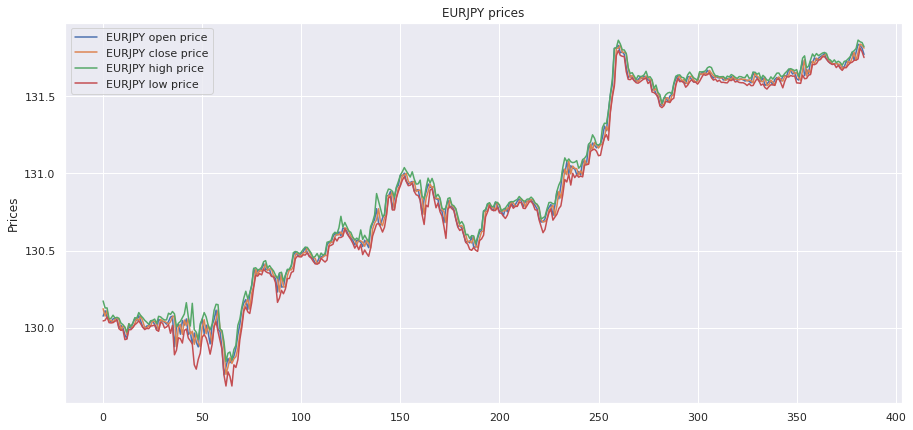

In [21]:
EURJPY['Open'].plot(label='EURJPY open price',figsize=(15,7))
EURJPY['Close'].plot(label='EURJPY close price',figsize=(15,7))
EURJPY['High'].plot(label='EURJPY high price',figsize=(15,7))
EURJPY['Low'].plot(label='EURJPY low price',figsize=(15,7))
plt.legend()
plt.ylabel('Prices')
plt.title('EURJPY prices')
plt.show()

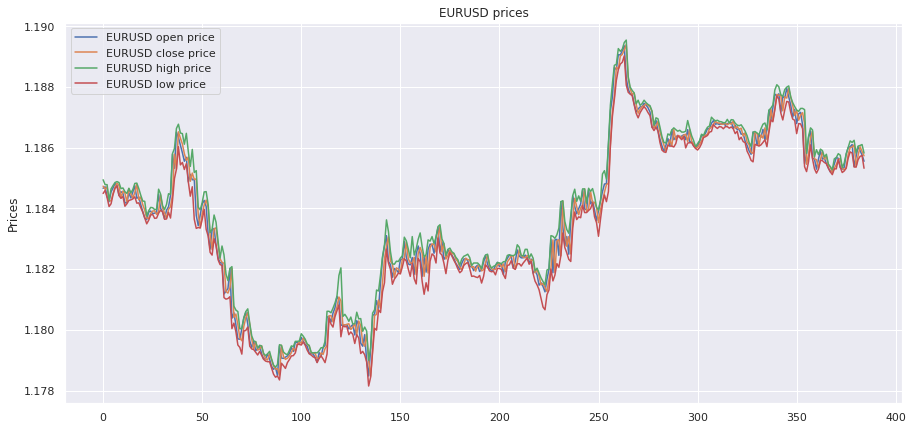

In [22]:
EURUSD['Open'].plot(label='EURUSD open price',figsize=(15,7))
EURUSD['Close'].plot(label='EURUSD close price',figsize=(15,7))
EURUSD['High'].plot(label='EURUSD high price',figsize=(15,7))
EURUSD['Low'].plot(label='EURUSD low price',figsize=(15,7))
plt.legend()
plt.ylabel('Prices')
plt.title('EURUSD prices')
plt.show()

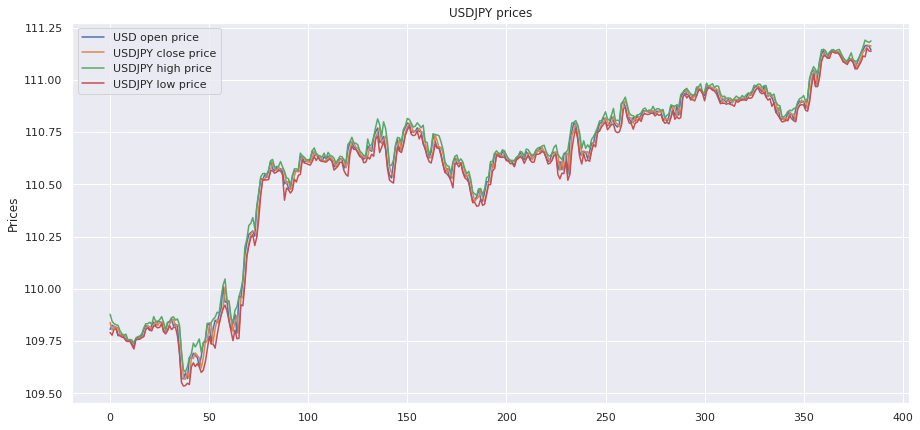

In [23]:
USDJPY['Open'].plot(label='USD open price',figsize=(15,7))
USDJPY['Close'].plot(label='USDJPY close price',figsize=(15,7))
USDJPY['High'].plot(label='USDJPY high price',figsize=(15,7))
USDJPY['Low'].plot(label='USDJPY low price',figsize=(15,7))
plt.legend()
plt.ylabel('Prices')
plt.title('USDJPY prices')
plt.show()

######Peak of Closing value is at 6th July for EURJPY

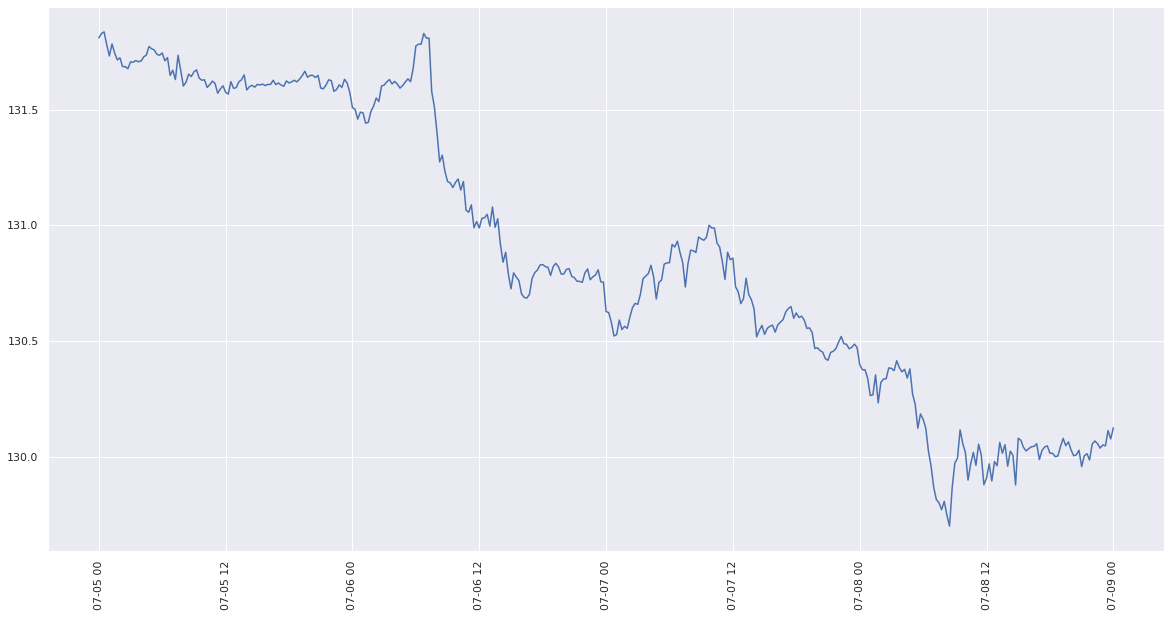

In [24]:
plt.figure(figsize=(20, 10))
plt.plot(EURJPY['Date'],EURJPY['Close'])
plt.xticks(rotation='vertical')
plt.grid(True)
plt.show()

######Peak of Closing value is at 6th July for EURUSD

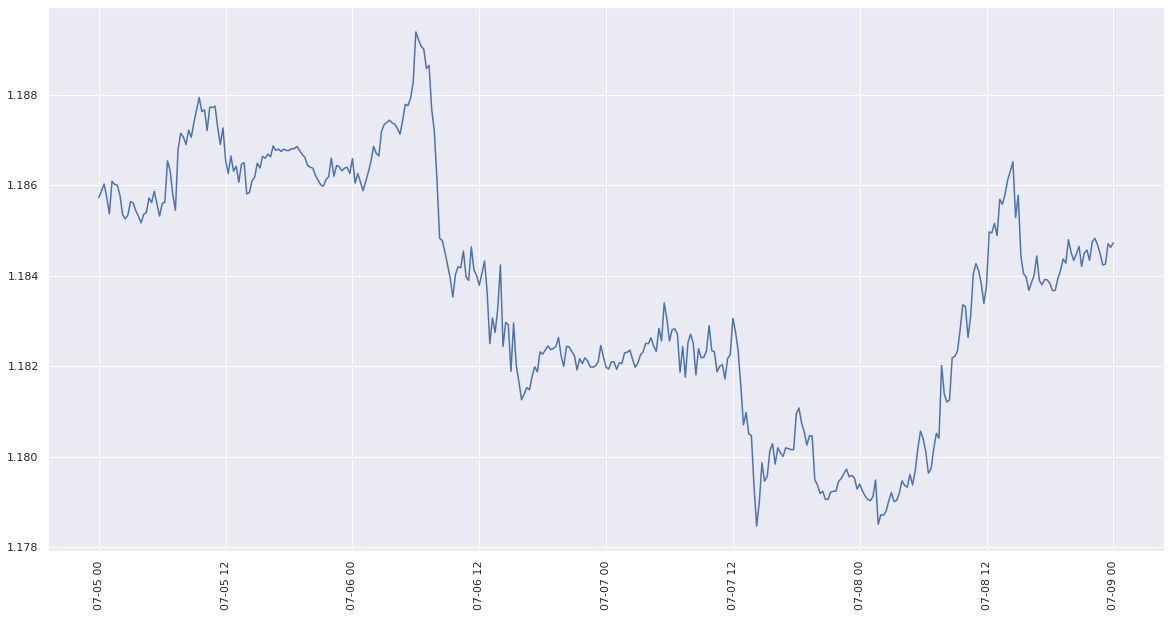

In [25]:
plt.figure(figsize=(20, 10))
plt.plot(EURUSD['Date'],EURUSD['Close'])
plt.xticks(rotation='vertical')
plt.grid(True)
plt.show()

Peek of Closing value is at 5th July for USDJPY

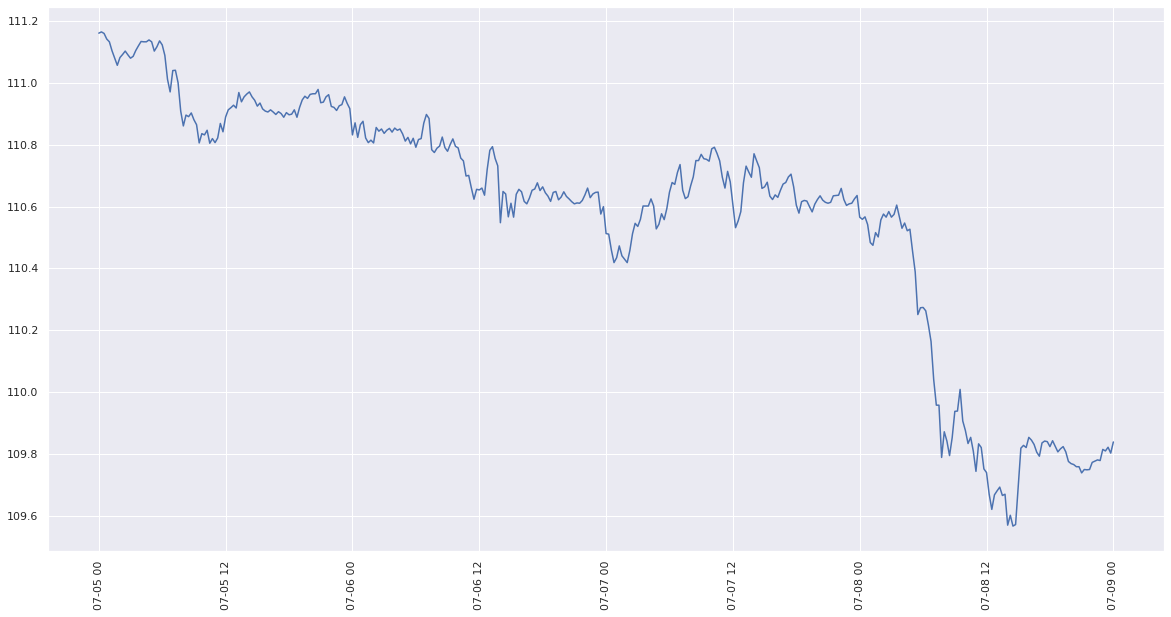

In [26]:
plt.figure(figsize=(20, 10))
plt.plot(USDJPY['Date'],USDJPY['Close'])
plt.xticks(rotation='vertical')
plt.grid(True)
plt.show()

In [27]:
mean_eurjpy = EURJPY['Close'].dropna().mean()
std_eurjpy = EURJPY['Close'].dropna().std()


eurjpy_norm = EURJPY['Close'].apply(lambda x: (x - mean_eurjpy ) / std_eurjpy)

In [28]:
mean_eurusd = EURUSD['Close'].dropna().mean()
std_eurusd = EURUSD['Close'].dropna().std()
eurusd_norm = EURUSD['Close'].apply(lambda x: (x - mean_eurusd ) / std_eurusd)


In [29]:
mean_usdjpy = USDJPY['Close'].dropna().mean()
std_usdjpy = USDJPY['Close'].dropna().std()
usdjpy_norm = USDJPY['Close'].apply(lambda x: (x - mean_usdjpy ) / std_usdjpy)

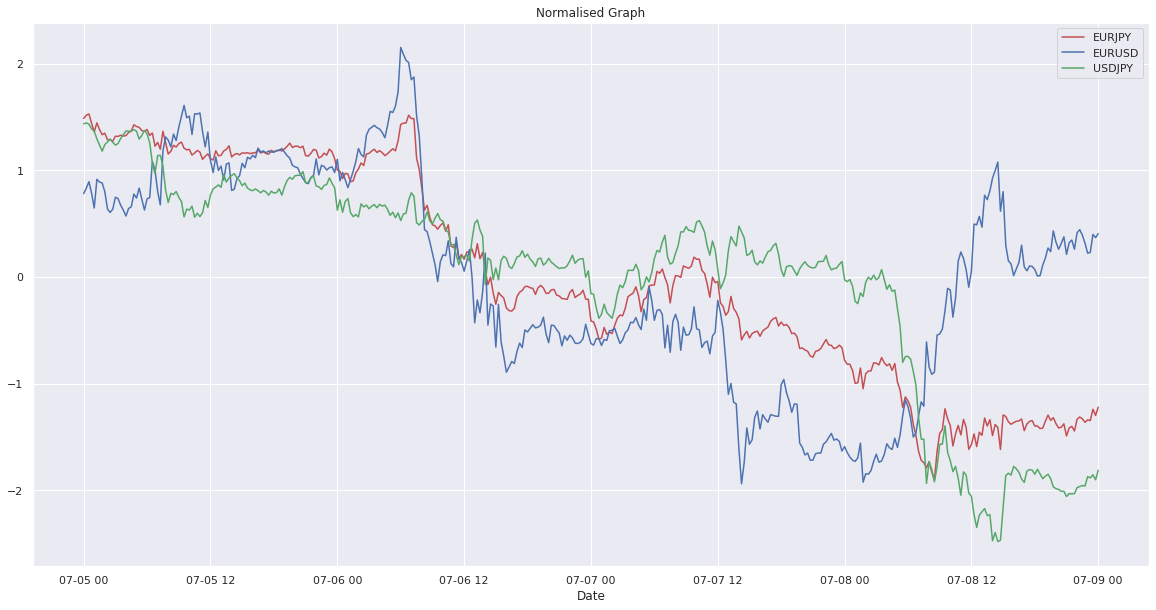

In [30]:
plt.figure(figsize=(20,10))
plt.plot(EURJPY['Date'],eurjpy_norm,color='r',label=EURJPY)
plt.plot(EURUSD['Date'],eurusd_norm,color='b',label=EURUSD)
plt.plot(USDJPY['Date'],usdjpy_norm,color='g',label=USDJPY)
plt.title('Normalised Graph')
plt.xlabel('Date')

plt.legend(['EURJPY', 'EURUSD', 'USDJPY'])
plt.show()

#ax[0].tick_params(labelrotation=90)
#ax[0].grid(True)
#ax[0].set_title('EURJPY');

#ax[1].plot(EURUSD['Date'],eurusd_norm,color='g')
#ax[1].tick_params(labelrotation=90)
#ax[1].grid(True)
#ax[1].set_title('EURUSD');

#ax[2].plot(USDJPY['Date'],usdjpy_norm,color='b')
#ax[2].tick_params(labelrotation=90)
#ax[2].grid(True)
#ax[2].set_title('USDJPY');

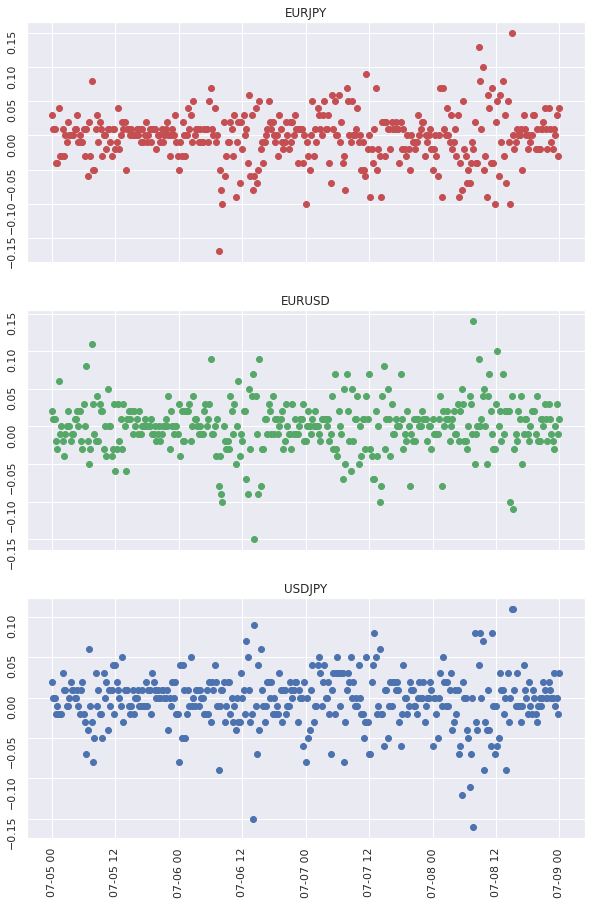

In [31]:
f,ax=plt.subplots(3,1,figsize=(10,15),sharex=True)
ax[0].scatter(EURJPY['Date'],EURJPY['Change(%)'],color='r')
ax[0].tick_params(labelrotation=90)
ax[0].grid(True)
ax[0].set_title('EURJPY');

ax[1].scatter(EURUSD['Date'],EURUSD['Change(%)'],color='g')
ax[1].tick_params(labelrotation=90)
ax[1].grid(True)
ax[1].set_title('EURUSD');

ax[2].scatter(USDJPY['Date'],USDJPY['Change(%)'],color='b')
ax[2].tick_params(labelrotation=90)
ax[2].grid(True)
ax[2].set_title('USDJPY');

In [32]:
eurjpy_close=EURJPY[['Close']]
eurusd_close=EURUSD[['Close']]
usdjpy_close=USDJPY[['Close']]

In [33]:
eurjpy_close_pct=eurjpy_close.pct_change()
eurusd_close_pct=eurusd_close.pct_change()
usdjpy_close_pct=usdjpy_close.pct_change()

In [34]:
eurjpy_close_pct.fillna(0,inplace=True)
eurusd_close_pct.fillna(0,inplace=True)
usdjpy_close_pct.fillna(0,inplace=True)

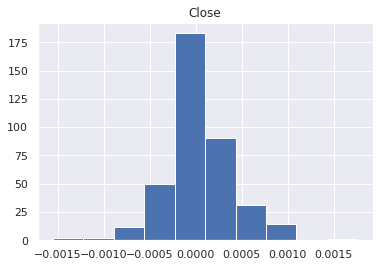

In [35]:
eurjpy_close_pct.hist()
plt.show();

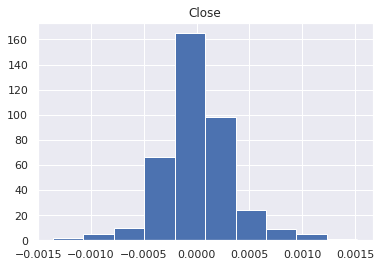

In [36]:
eurusd_close_pct.hist()
plt.show();

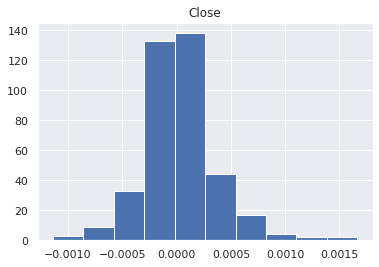

In [37]:
usdjpy_close_pct.hist()
plt.show();

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

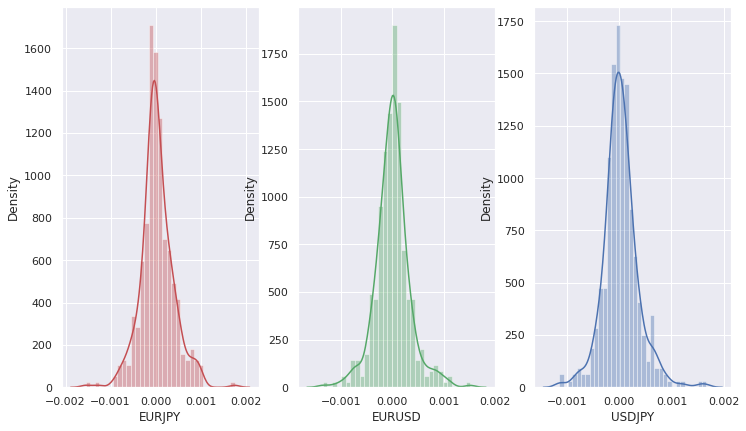

In [38]:
f,axes=plt.subplots(1,3,figsize=(12,7))
sns.distplot(eurjpy_close_pct['Close'],color='r',ax=axes[0],axlabel='EURJPY');
sns.distplot(eurusd_close_pct['Close'],color='g',ax=axes[1],axlabel='EURUSD');
sns.distplot(usdjpy_close_pct['Close'],color='b',ax=axes[2],axlabel='USDJPY');

##Correlations across the datasets 

In [39]:
combined=pd.concat([EURJPY['Date'],EURJPY['Close'],EURUSD['Close'],USDJPY['Close']],axis=1)
combined.columns=['Date','EURJPY Close','EURUSD Close','USDJPY Close']

In [40]:
combined['EURJPY Close'].corr(combined['EURUSD Close'])

0.6600384689972004

In [41]:
combined['EURJPY Close'].corr(combined['USDJPY Close'])

0.8876519218535467

In [42]:
combined['EURUSD Close'].corr(combined['USDJPY Close'])

0.23999942723246576

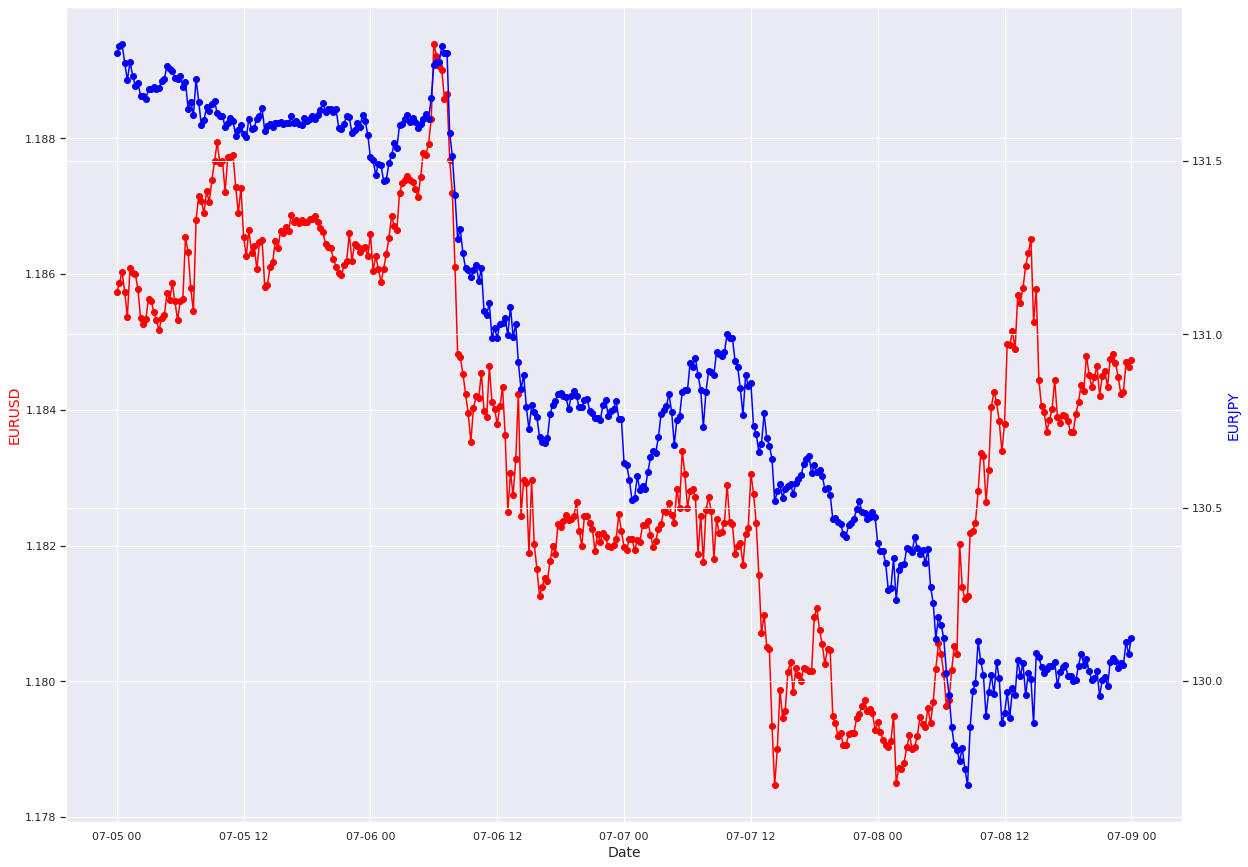

In [43]:

fig,ax = plt.subplots(figsize=(20,15),sharex=True)

ax.plot(combined['Date'], combined['EURUSD Close'], color="red", marker="o")

ax.set_xlabel("Date",fontsize=14)

ax.set_ylabel("EURUSD",color="red",fontsize=14)

ax2=ax.twinx()

ax2.plot(combined['Date'], combined['EURJPY Close'],color="blue",marker="o")
ax2.set_ylabel("EURJPY",color="blue",fontsize=14)

plt.show()


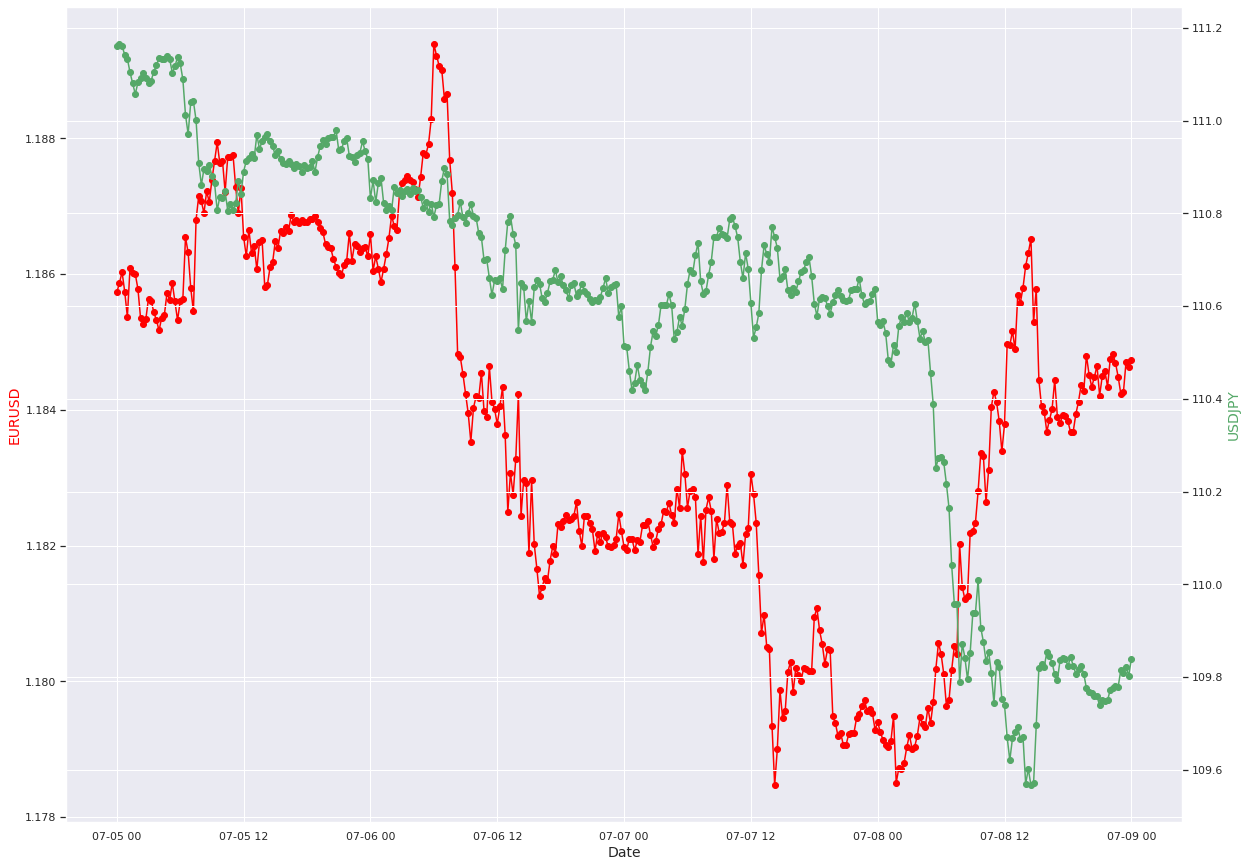

In [44]:

fig,ax = plt.subplots(figsize=(20,15),sharex=True)

ax.plot(combined['Date'], combined['EURUSD Close'], color="red", marker="o")

ax.set_xlabel("Date",fontsize=14)

ax.set_ylabel("EURUSD",color="red",fontsize=14)

ax2=ax.twinx()

ax2.plot(combined['Date'], combined['USDJPY Close'],color="g",marker="o")
ax2.set_ylabel("USDJPY",color="g",fontsize=14)

plt.show()

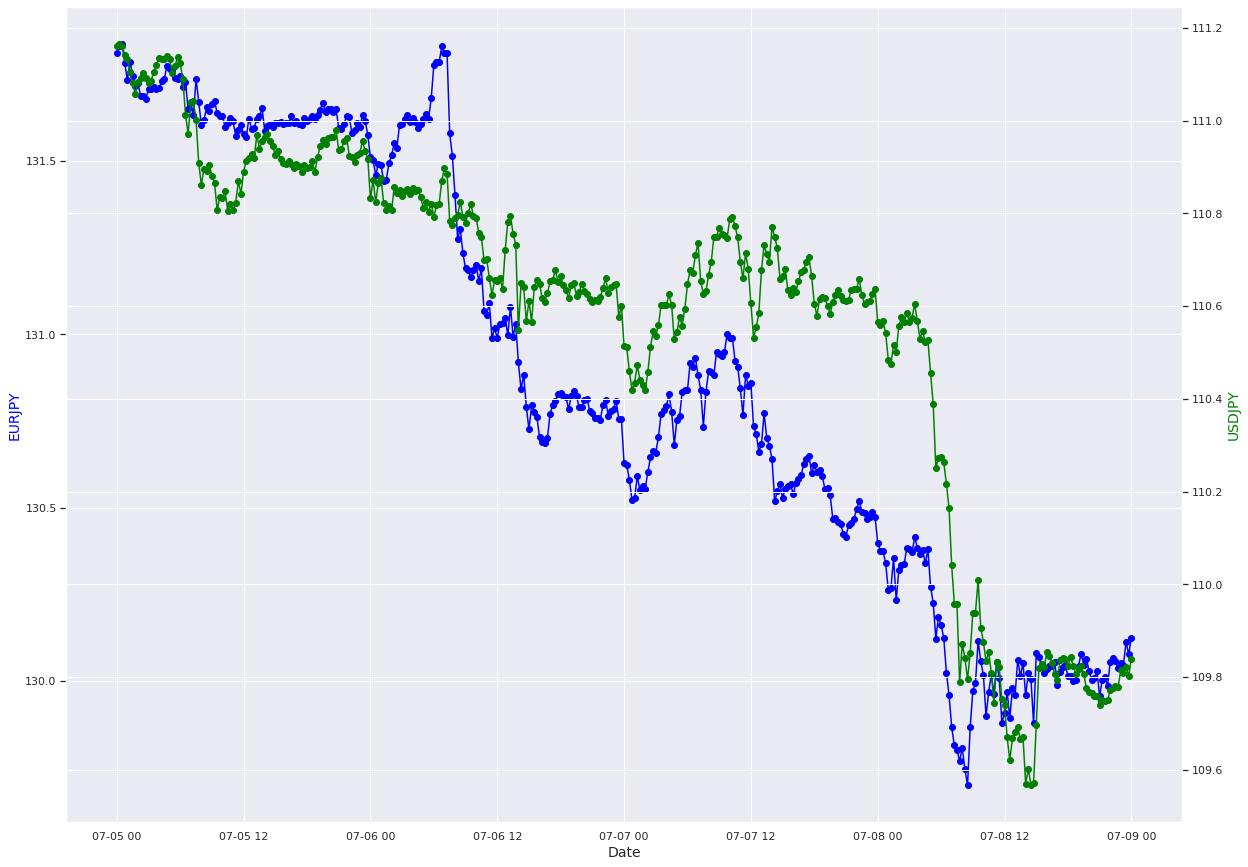

In [45]:

fig,ax = plt.subplots(figsize=(20,15),sharex=True)

ax.plot(combined['Date'], combined['EURJPY Close'], color="blue", marker="o")

ax.set_xlabel("Date",fontsize=14)

ax.set_ylabel("EURJPY",color="blue",fontsize=14)

ax2=ax.twinx()

ax2.plot(combined['Date'], combined['USDJPY Close'],color="green",marker="o")
ax2.set_ylabel("USDJPY",color="green",fontsize=14)

plt.show()

#Analysis of 5th July data

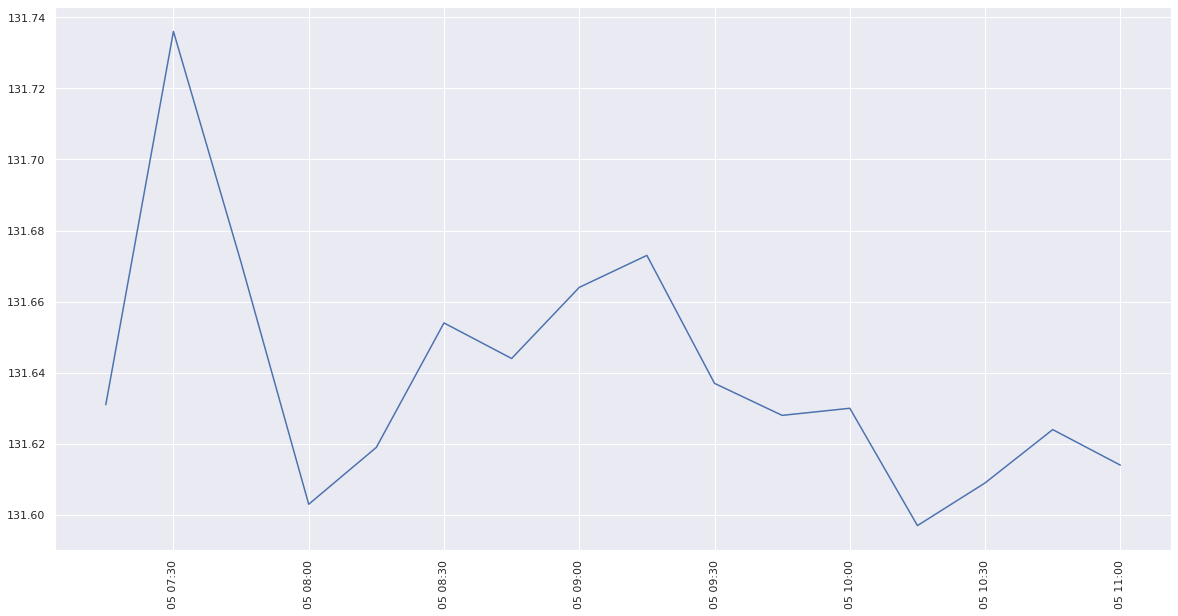

In [46]:
idx_eurjpy_1 = (EURJPY['Date'] > '07/05/2021 07:00') & (EURJPY['Date'] <= '07/05/2021 11:00')
plt.figure(figsize=(20, 10))
plt.plot(EURJPY.loc[idx_eurjpy_1,'Date'],EURJPY.loc[idx_eurjpy_1,'Close'])
plt.xticks(rotation='vertical')
plt.grid(True)
plt.show()

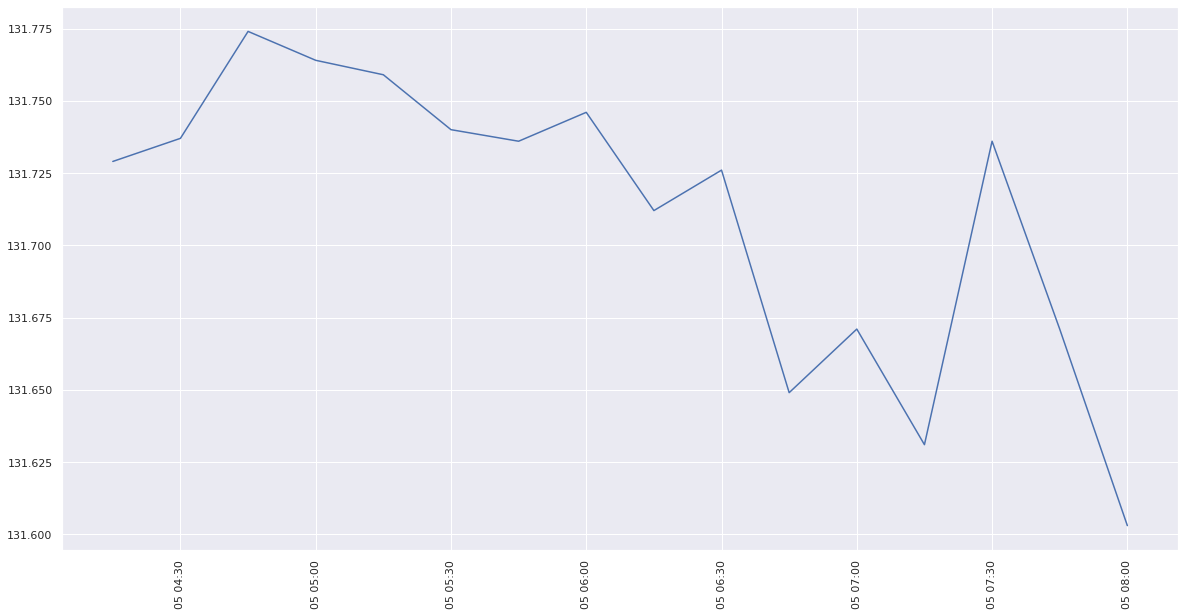

In [47]:
idx_eurjpy_2 = (EURJPY['Date'] > '07/05/2021 04:00') & (EURJPY['Date'] <= '07/05/2021 08:00')
plt.figure(figsize=(20, 10))
plt.plot(EURJPY.loc[idx_eurjpy_2,'Date'],EURJPY.loc[idx_eurjpy_2,'Close'])
plt.xticks(rotation='vertical')
plt.grid(True)
plt.show()

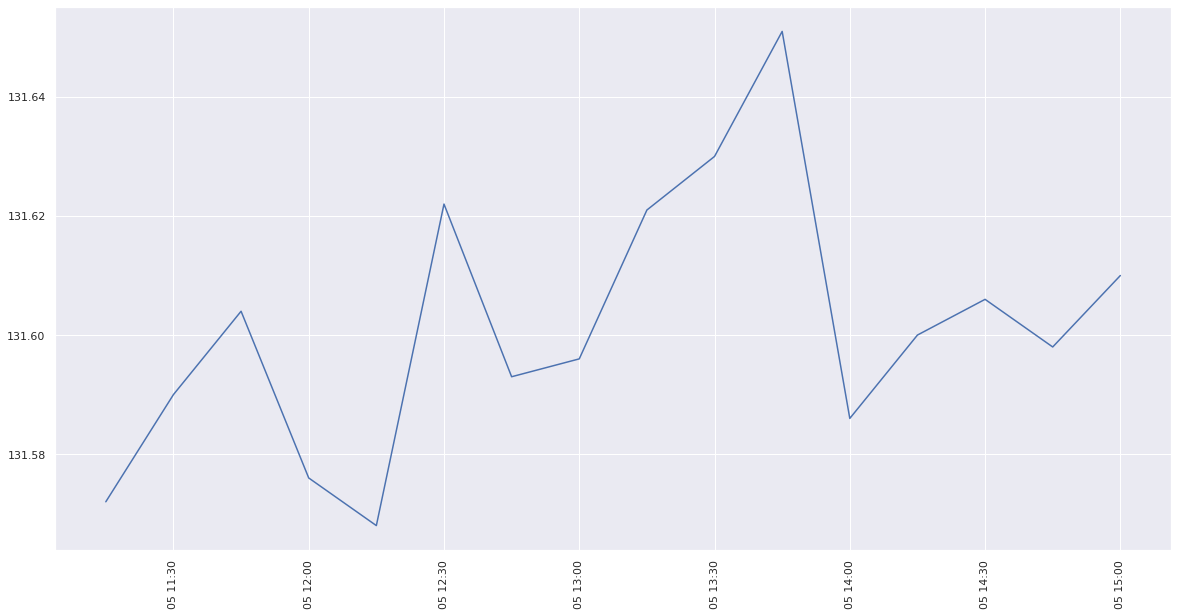

In [48]:
idx_eurjpy_3 = (EURJPY['Date'] > '07/05/2021 11:00') & (EURJPY['Date'] <= '07/05/2021 15:00')
plt.figure(figsize=(20, 10))
plt.plot(EURJPY.loc[idx_eurjpy_3,'Date'],EURJPY.loc[idx_eurjpy_3,'Close'])
plt.xticks(rotation='vertical')
plt.grid(True)
plt.show()

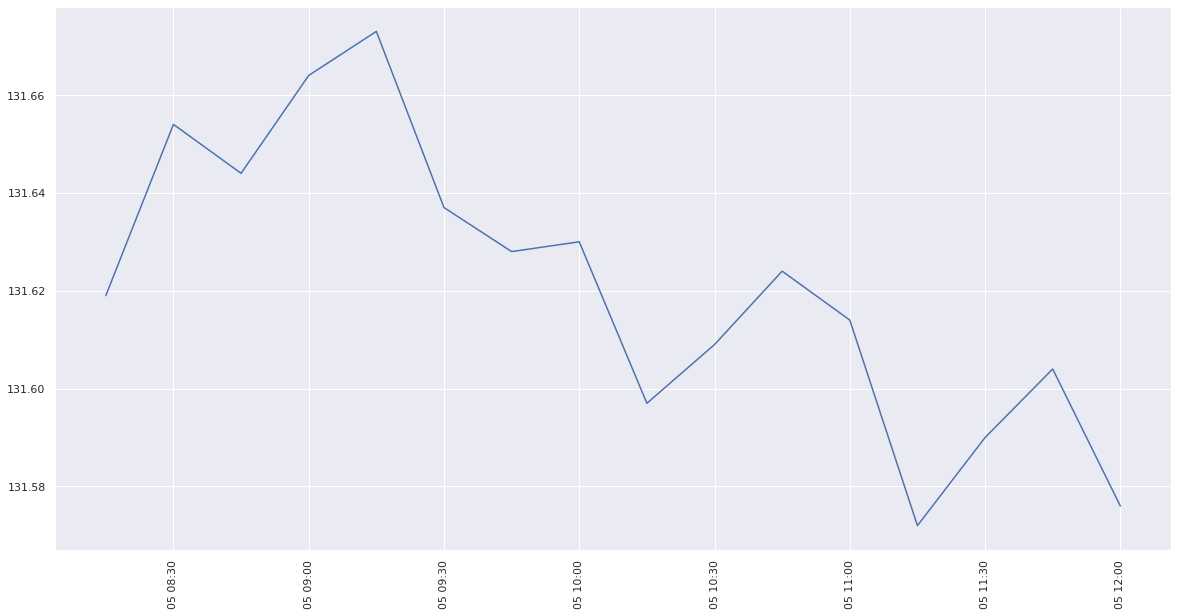

In [49]:
idx_eurjpy_4 = (EURJPY['Date'] > '07/05/2021 08:00') & (EURJPY['Date'] <= '07/05/2021 12:00')
plt.figure(figsize=(20, 10))
plt.plot(EURJPY.loc[idx_eurjpy_4,'Date'],EURJPY.loc[idx_eurjpy_4,'Close'])
plt.xticks(rotation='vertical')
plt.grid(True)
plt.show()

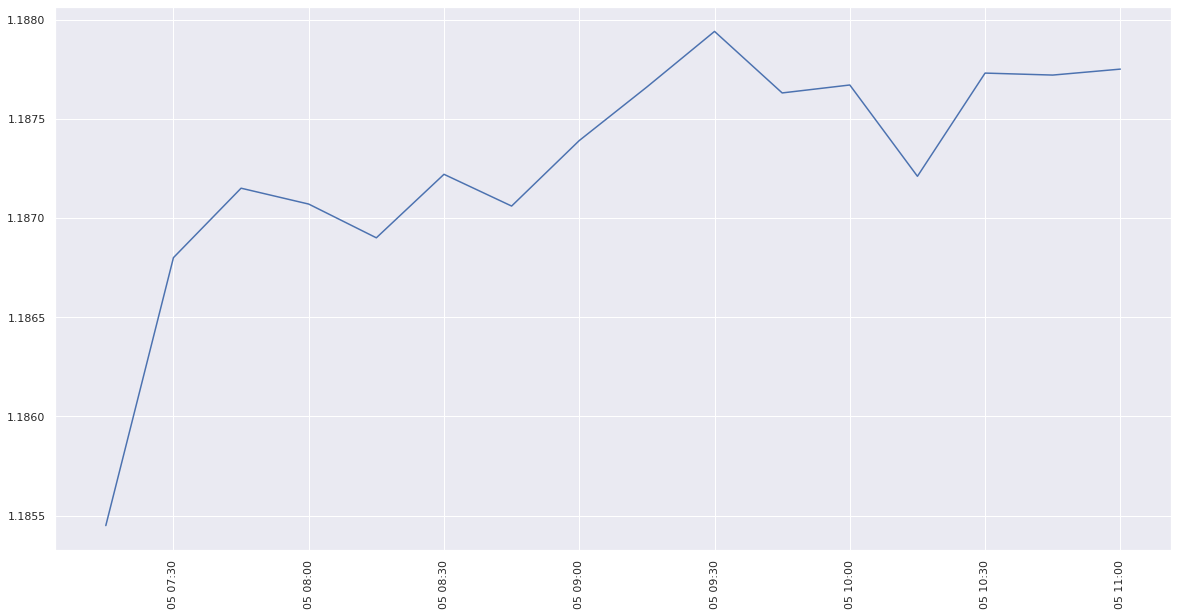

In [50]:
idx_eurusd_1 = (EURUSD['Date'] > '07/05/2021 07:00') & (EURUSD['Date'] <= '07/05/2021 11:00')
plt.figure(figsize=(20, 10))
plt.plot(EURUSD.loc[idx_eurusd_1,'Date'],EURUSD.loc[idx_eurusd_1,'Close'])
plt.xticks(rotation='vertical')
plt.grid(True)
plt.show()

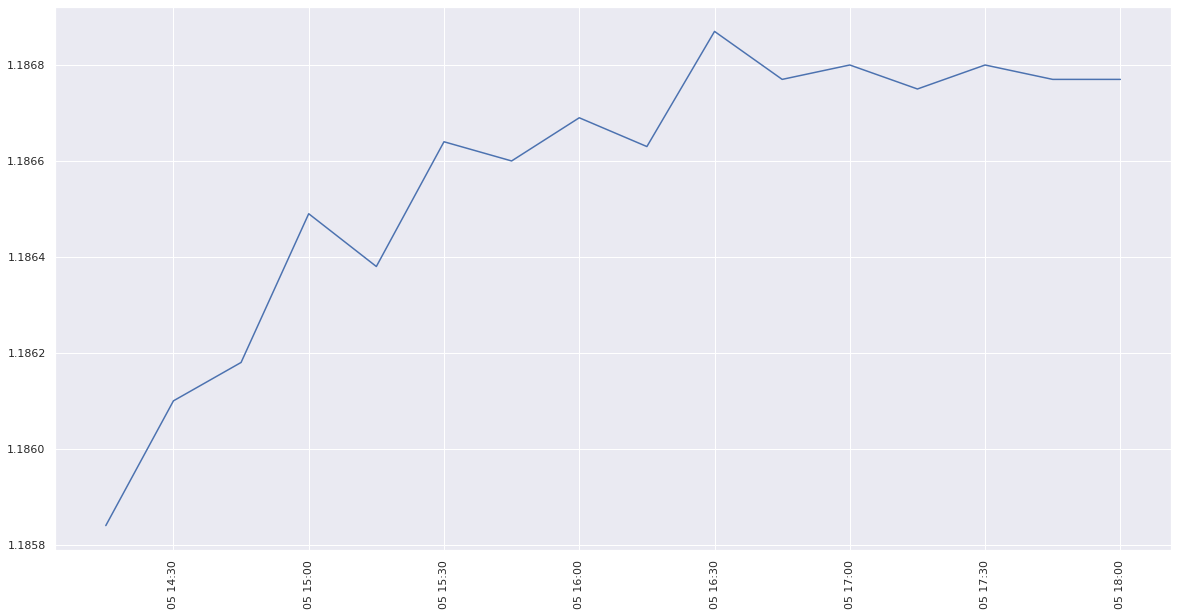

In [51]:
idx_eurusd_2 = (EURUSD['Date'] > '07/05/2021 14:00') & (EURUSD['Date'] <= '07/05/2021 18:00')
plt.figure(figsize=(20, 10))
plt.plot(EURUSD.loc[idx_eurusd_2,'Date'],EURUSD.loc[idx_eurusd_2,'Close'])
plt.xticks(rotation='vertical')
plt.grid(True)
plt.show()

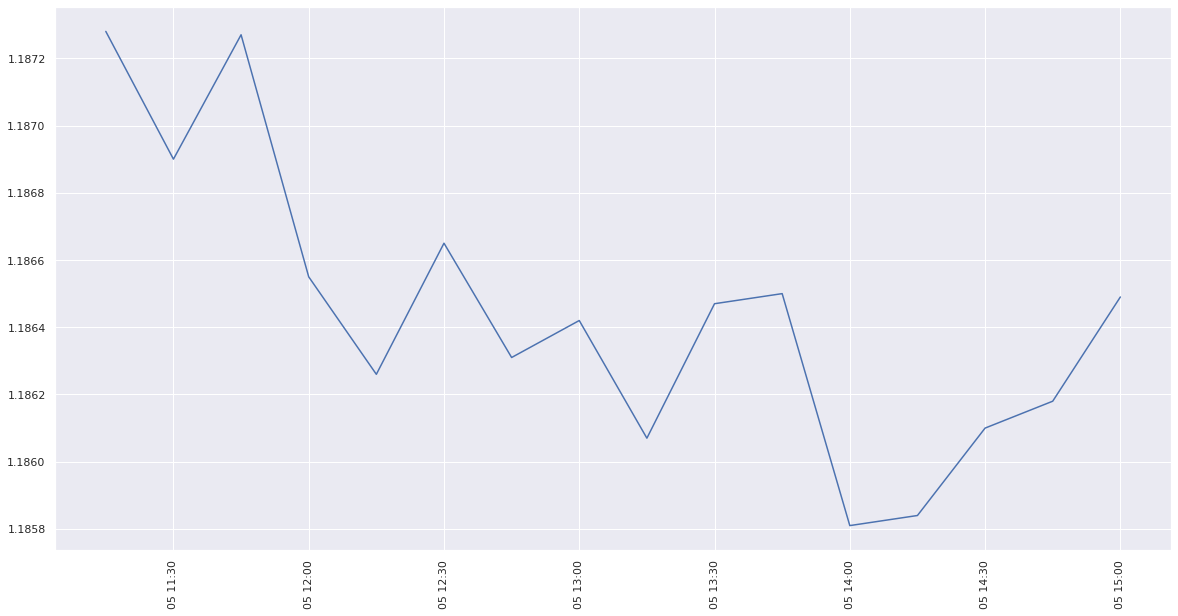

In [52]:
idx_eurusd_3 = (EURUSD['Date'] > '07/05/2021 11:00') & (EURUSD['Date'] <= '07/05/2021 15:00')
plt.figure(figsize=(20, 10))
plt.plot(EURUSD.loc[idx_eurusd_3,'Date'],EURUSD.loc[idx_eurusd_3,'Close'])
plt.xticks(rotation='vertical')
plt.grid(True)
plt.show()

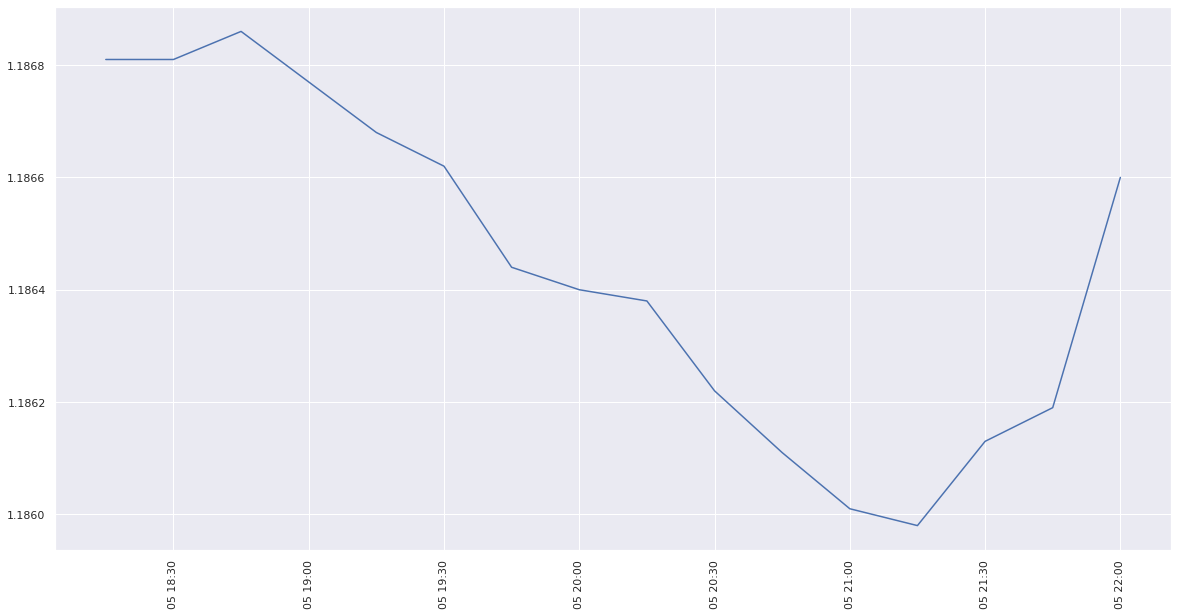

In [53]:
idx_eurusd_4 = (EURUSD['Date'] > '07/05/2021 18:00') & (EURUSD['Date'] <= '07/05/2021 22:00')
plt.figure(figsize=(20, 10))
plt.plot(EURUSD.loc[idx_eurusd_4,'Date'],EURUSD.loc[idx_eurusd_4,'Close'])
plt.xticks(rotation='vertical')
plt.grid(True)
plt.show()

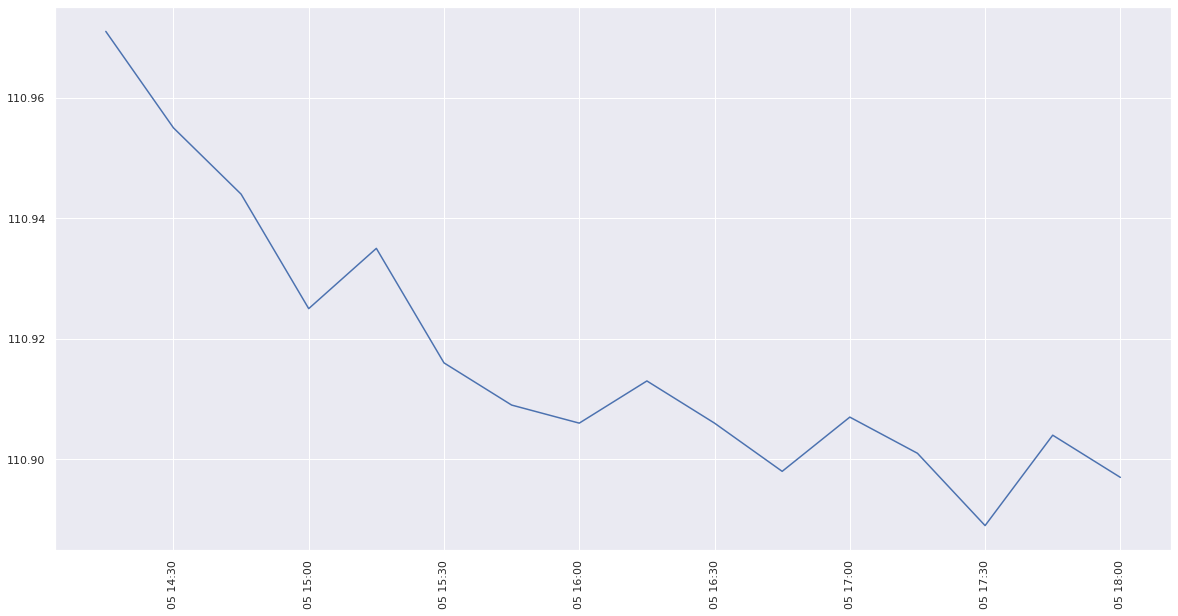

In [54]:
idx_usdjpy_1 = (USDJPY['Date'] > '07/05/2021 14:00') & (USDJPY['Date'] <= '07/05/2021 18:00')
plt.figure(figsize=(20, 10))
plt.plot(USDJPY.loc[idx_usdjpy_1,'Date'],USDJPY.loc[idx_usdjpy_1,'Close'])
plt.xticks(rotation='vertical')
plt.grid(True)
plt.show()

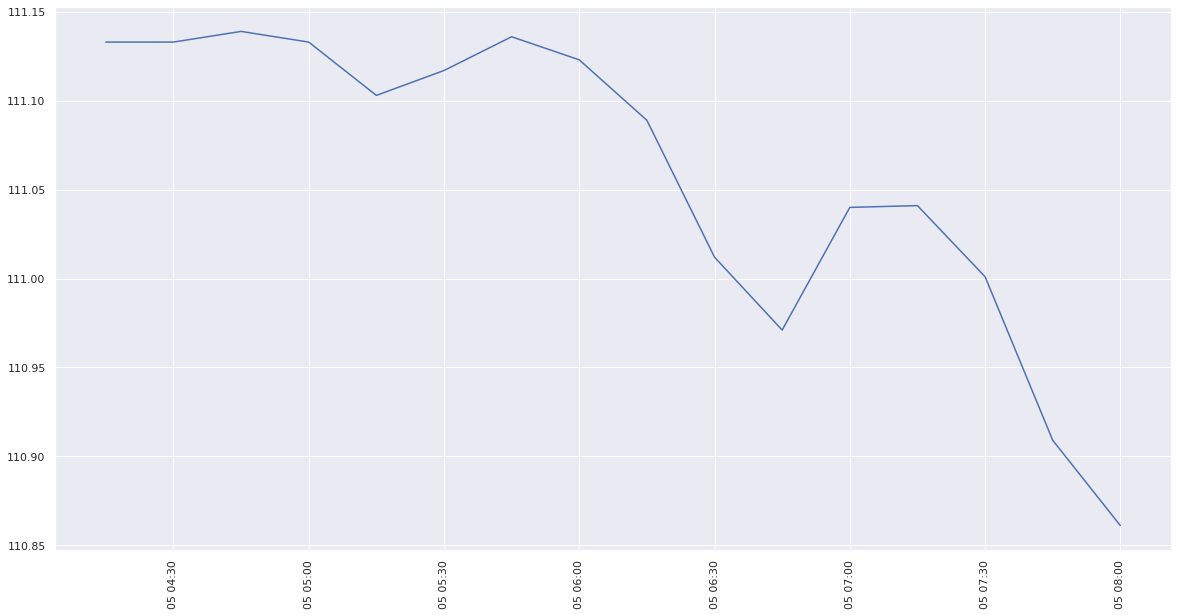

In [55]:
idx_usdjpy_2 = (USDJPY['Date'] > '07/05/2021 04:00') & (USDJPY['Date'] <= '07/05/2021 08:00')
plt.figure(figsize=(20, 10))
plt.plot(USDJPY.loc[idx_usdjpy_2,'Date'],USDJPY.loc[idx_usdjpy_2,'Close'])
plt.xticks(rotation='vertical')
plt.grid(True)
plt.show()

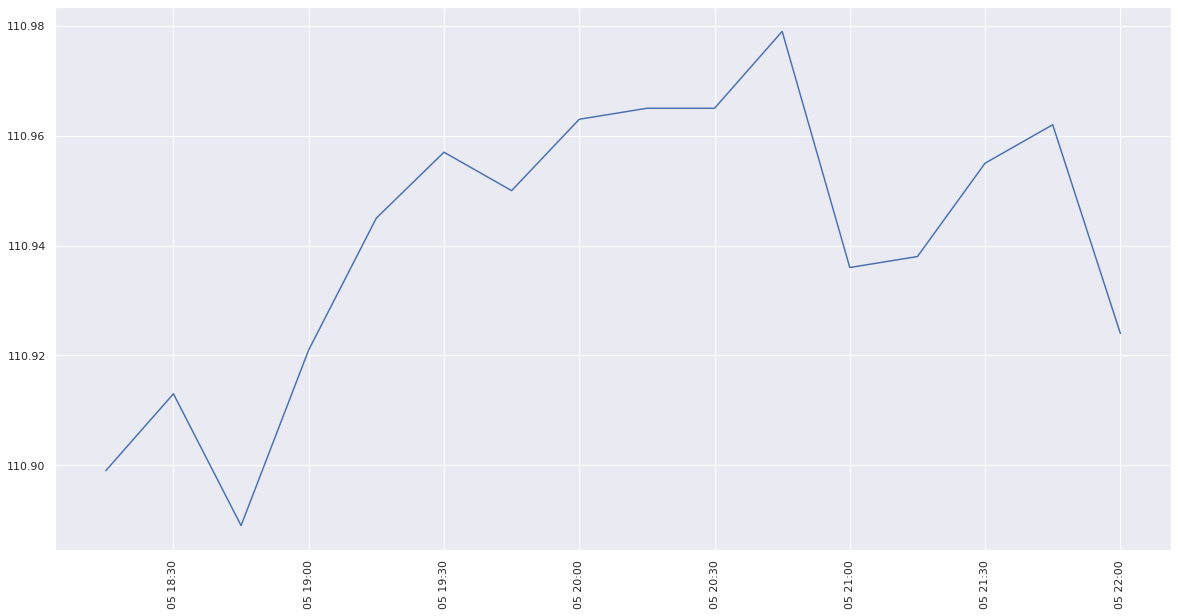

In [56]:
idx_usdjpy_3 = (USDJPY['Date'] > '07/05/2021 18:00') & (USDJPY['Date'] <= '07/05/2021 22:00')
plt.figure(figsize=(20, 10))
plt.plot(USDJPY.loc[idx_usdjpy_3,'Date'],USDJPY.loc[idx_usdjpy_3,'Close'])
plt.xticks(rotation='vertical')
plt.grid(True)
plt.show()

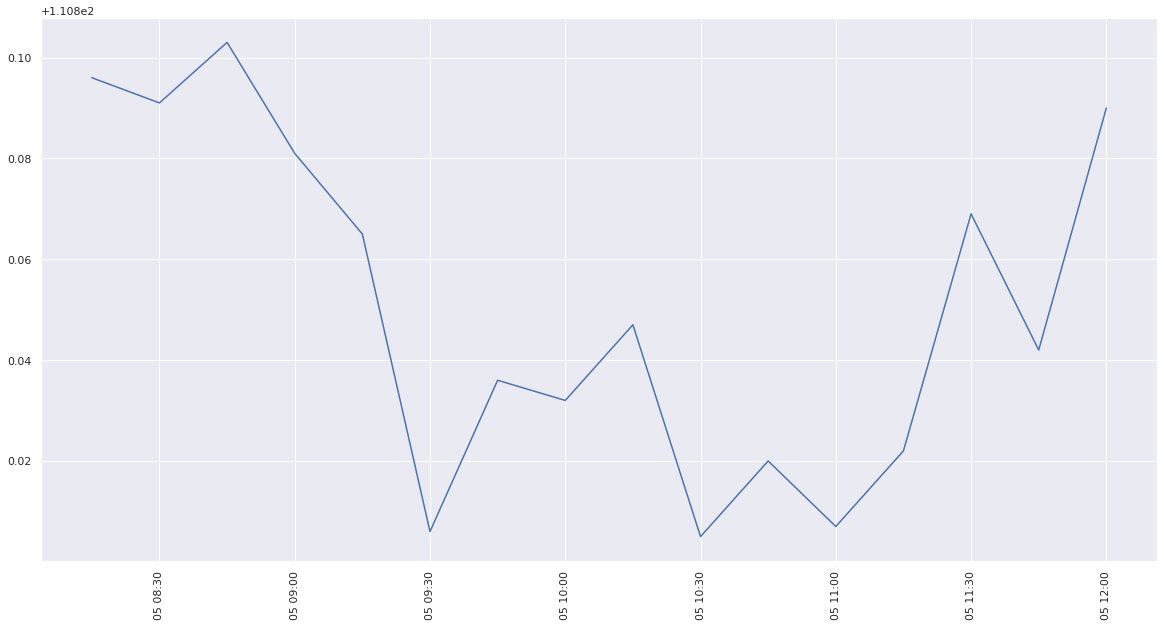

In [57]:
idx_usdjpy_4 = (USDJPY['Date'] > '07/05/2021 08:00') & (USDJPY['Date'] <= '07/05/2021 12:00')
plt.figure(figsize=(20, 10))
plt.plot(USDJPY.loc[idx_usdjpy_4,'Date'],USDJPY.loc[idx_usdjpy_4,'Close'])
plt.xticks(rotation='vertical')
plt.grid(True)
plt.show()

##Rolling window analysis

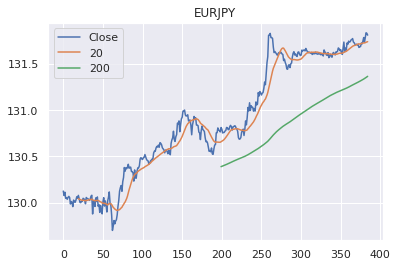

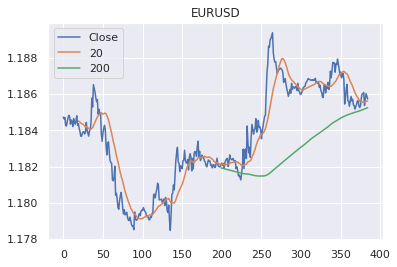

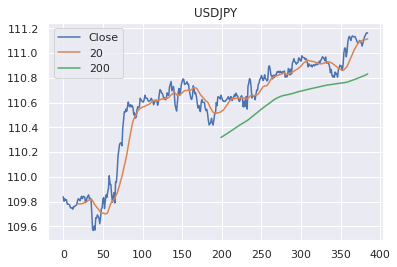

In [58]:
eurjpy_close_px=EURJPY['Close']
EURJPY['20']=eurjpy_close_px.rolling(window=20).mean()
EURJPY['200']=eurjpy_close_px.rolling(window=200).mean()
EURJPY[['Close','20','200']].plot(title='EURJPY')
plt.show()
eurusd_close_px=EURUSD['Close']
EURUSD['20']=eurusd_close_px.rolling(window=20).mean()
EURUSD['200']=eurusd_close_px.rolling(window=200).mean()
EURUSD[['Close','20','200']].plot(title='EURUSD')
plt.show()
usdjpy_close_px=USDJPY['Close']
USDJPY['20']=usdjpy_close_px.rolling(window=20).mean()
USDJPY['200']=usdjpy_close_px.rolling(window=200).mean()
USDJPY[['Close','20','200']].plot(title='USDJPY')
plt.show()

##Seasonal Decomposition

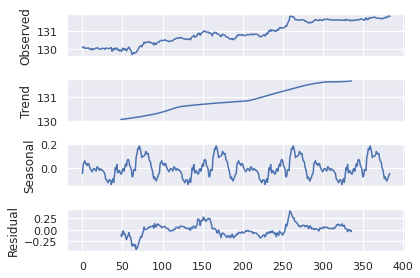

In [53]:
from statsmodels.tsa.seasonal import seasonal_decompose
import statsmodels.api as sm
decompfreq = ((24*60)//15)

analysis_eurjpy = EURJPY[['Close']].copy()
analysis_eurjpy=analysis_eurjpy.dropna()
decompose_result_mult = seasonal_decompose(analysis_eurjpy, model="additive",freq=decompfreq)
trend = decompose_result_mult.trend
seasonal = decompose_result_mult.seasonal
residual = decompose_result_mult.resid

decompose_result_mult.plot();



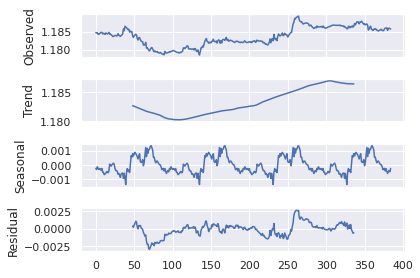

In [54]:
analysis_eurusd = EURUSD[['Close']].copy()
decompose_result_mult = seasonal_decompose(analysis_eurusd, model="additive",freq=decompfreq)
trend = decompose_result_mult.trend
seasonal = decompose_result_mult.seasonal
residual = decompose_result_mult.resid

decompose_result_mult.plot();


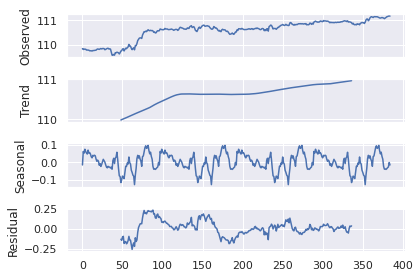

In [55]:
analysis_usdjpy = USDJPY[['Close']].copy()
decompose_result_mult = seasonal_decompose(analysis_usdjpy, model="additive",freq=decompfreq)
trend = decompose_result_mult.trend
seasonal = decompose_result_mult.seasonal
residual = decompose_result_mult.resid

decompose_result_mult.plot();


##ARIMA model

In [56]:
from statsmodels.tsa.stattools import adfuller, kpss

In [57]:

test_result = adfuller(EURJPY['Close'])
print ('ADF Test:')
labels = ['ADF Statistic','p-value','No. of Lags Used','Number of Observations Used']

for value,label in zip(test_result,labels):
    print (label+': '+str(value))
if test_result[1] <= 0.05:
    print ("Reject null hypothesis and data is stationary")
else:
    print ("Fail to reject H0 thereby data is non-stationary ")

ADF Test:
ADF Statistic: -0.7314123399853389
p-value: 0.8384444137362413
No. of Lags Used: 3
Number of Observations Used: 381
Fail to reject H0 thereby data is non-stationary 


In [58]:
def check_adf(time_series):
    test_result = adfuller(time_series)
    print ('ADF Test:')
    labels = ['ADF Statistic','p-value','No. of Lags Used','Number of Observations Used']
    for value,label in zip(test_result,labels):
        print (label+': '+str(value))
    if test_result [1] <= 0.05:
        print ("Reject null hypothesis and data is stationary")
    else:
        print ("fail to reject H0 and data is non-stationary ")

In [59]:
EURJPY['Close'] = EURJPY['Close'] - EURJPY['Close']. shift (1)
check_adf(EURJPY['Close'].dropna())


ADF Test:
ADF Statistic: -9.863304549588825
p-value: 4.177341812334344e-17
No. of Lags Used: 2
Number of Observations Used: 381
Reject null hypothesis and data is stationary


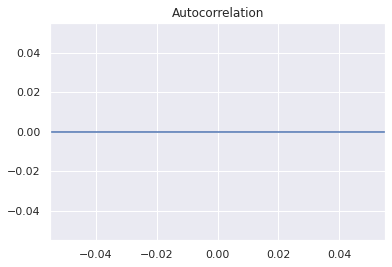

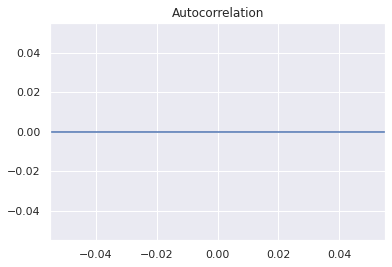

In [60]:
plot_acf(EURJPY['Close'])

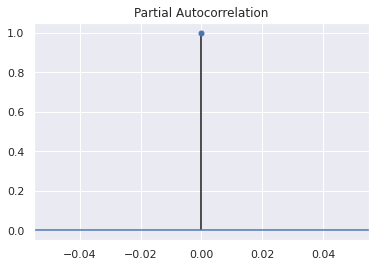

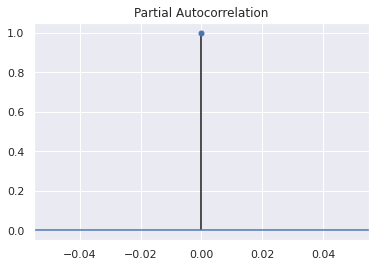

In [61]:
plot_pacf(EURJPY['Close'])

In [59]:
from statsmodels.tsa.arima_model import ARIMA

In [60]:
def StartARIMAForecasting(Actual, P, D, Q):
	model = ARIMA(Actual, order=(P, D, Q))
	model_fit = model.fit(disp=0)
	prediction = model_fit.forecast()[0]
	return prediction

In [63]:
NumberOfElements_eurjpy = len(EURJPY['Close'])

In [66]:
TrainingSize = int(NumberOfElements_eurjpy * 0.7)
TrainingData =  EURJPY[0:TrainingSize]
TestData = EURJPY[TrainingSize:NumberOfElements_eurjpy]

In [70]:
TrainingData=TrainingData['Close']

In [71]:
TestData=TestData['Close']

In [72]:
Actual = [x for x in TrainingData]
Predictions = list()

In [73]:
for timepoint in range(len(TestData)):
	ActualValue =  TestData[timepoint]
	#forcast value
	Prediction = StartARIMAForecasting(Actual, 3,1,0)    
	print('Actual=%f, Predicted=%f' % (ActualValue, Prediction))
	#add it in the list
	Predictions.append(Prediction)
	Actual.append(ActualValue)


KeyError: ignored

In [63]:
model_eurjpy = ARIMA(EURJPY['Close'].dropna(),order=(0, 1, 1))
ARIMAresult_1 = model_eurjpy.fit()
print (ARIMAresult_1.summary())

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


                             ARIMA Model Results                              
Dep. Variable:                D.Close   No. Observations:                  383
Model:                 ARIMA(0, 1, 1)   Log Likelihood                 616.492
Method:                       css-mle   S.D. of innovations              0.048
Date:                Wed, 04 Aug 2021   AIC                          -1226.984
Time:                        12:27:57   BIC                          -1215.140
Sample:                             1   HQIC                         -1222.286
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const          6.716e-06   2.21e-05      0.304      0.761   -3.66e-05       5e-05
ma.L1.D.Close    -1.0000      0.008   -131.088      0.000      -1.015      -0.985
                                    Root

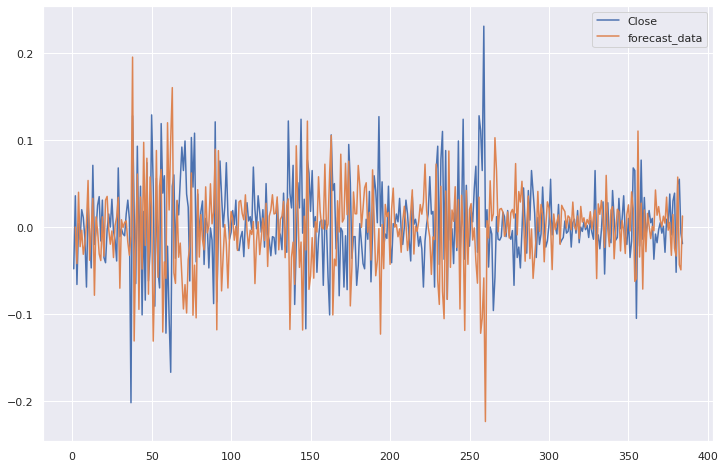

In [64]:
EURJPY['forecast_data'] = ARIMAresult_1.predict()
EURJPY[['Close','forecast_data']]. plot (figsize= (12,8))

In [65]:
EURJPY

,Date,Open,High,Low,Close,Change(Pips),Change(%),20,200,forecast_data
0,2021-07-09 00:00:00,130.077,130.175,130.046,NaN,4.8,0.04,NaN,NaN,NaN
1,2021-07-08 23:45:00,130.112,130.130,130.050,-0.048,-3.5,-0.03,NaN,NaN,NaN
2,2021-07-08 23:30:00,130.073,130.130,130.072,0.036,4.0,0.03,NaN,NaN,0.000007
3,2021-07-08 23:15:00,130.050,130.058,130.035,-0.066,-0.3,0.00,NaN,NaN,-0.041990
4,2021-07-08 23:00:00,130.040,130.063,130.033,0.004,1.1,0.01,NaN,NaN,0.040013
...,...,...,...,...,...,...,...,...,...,...
380,2021-07-05 01:00:00,131.784,131.809,131.733,-0.052,-5.1,-0.04,131.72705,131.341875,-0.033344
381,2021-07-05 00:45:00,131.836,131.863,131.741,0.049,-5.4,-0.04,131.72935,131.347470,0.057511
382,2021-07-05 00:30:00,131.828,131.852,131.812,0.055,0.9,0.01,131.73420,131.353430,-0.043368
383,2021-07-05 00:15:00,131.811,131.847,131.788,-0.007,1.9,0.01,131.73775,131.359565,-0.049232


In [66]:

test_result_eurusd = adfuller(EURUSD['Close'])
print ('ADF Test:')
labels = ['ADF Statistic','p-value','No. of Lags Used','Number of Observations Used']

for value,label in zip(test_result_eurusd,labels):
    print (label+': '+str(value))
if test_result[1] <= 0.05:
    print ("Reject null hypothesis and data is stationary")
else:
    print ("Fail to reject H0 thereby data is non-stationary ")

ADF Test:
ADF Statistic: -1.4701595167427894
p-value: 0.5482179898440808
No. of Lags Used: 5
Number of Observations Used: 379
Fail to reject H0 thereby data is non-stationary 


In [67]:
EURUSD['Close'] = EURUSD['Close'] - EURUSD['Close']. shift (1)
check_adf(EURUSD['Close'].dropna())

ADF Test:
ADF Statistic: -7.5820818174842275
p-value: 2.665435475982254e-11
No. of Lags Used: 4
Number of Observations Used: 379
Reject null hypothesis and data is stationary


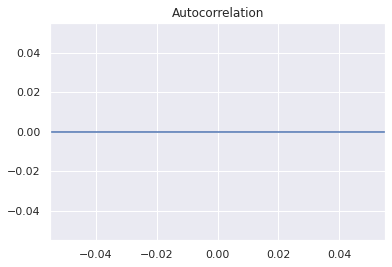

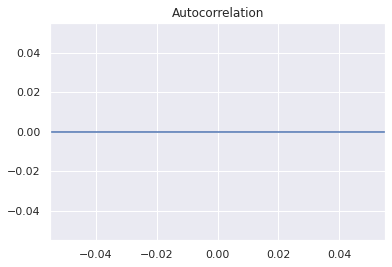

In [68]:
plot_acf(EURUSD['Close'])

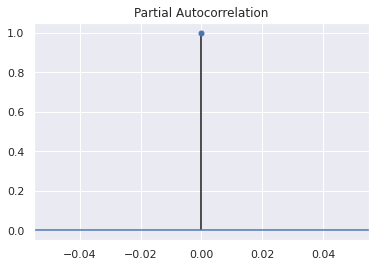

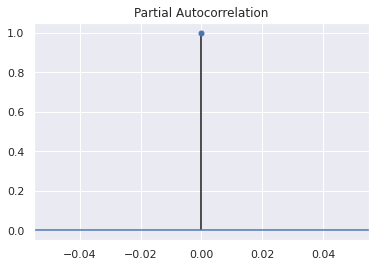

In [69]:
plot_pacf(EURUSD['Close'])

In [70]:
model_eurusd = ARIMA(EURUSD['Close'].dropna(),order=(0,1,1))
ARIMAresult_2 = model_eurusd.fit()
print (ARIMAresult_2.summary())

                             ARIMA Model Results                              
Dep. Variable:                D.Close   No. Observations:                  383
Model:                 ARIMA(0, 1, 1)   Log Likelihood                2448.681
Method:                       css-mle   S.D. of innovations              0.000
Date:                Wed, 04 Aug 2021   AIC                          -4891.362
Time:                        12:28:00   BIC                          -4879.518
Sample:                             1   HQIC                         -4886.664
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const           1.24e-07   1.87e-07      0.664      0.507   -2.42e-07     4.9e-07
ma.L1.D.Close    -0.9989      0.009   -107.134      0.000      -1.017      -0.981
                                    Root

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


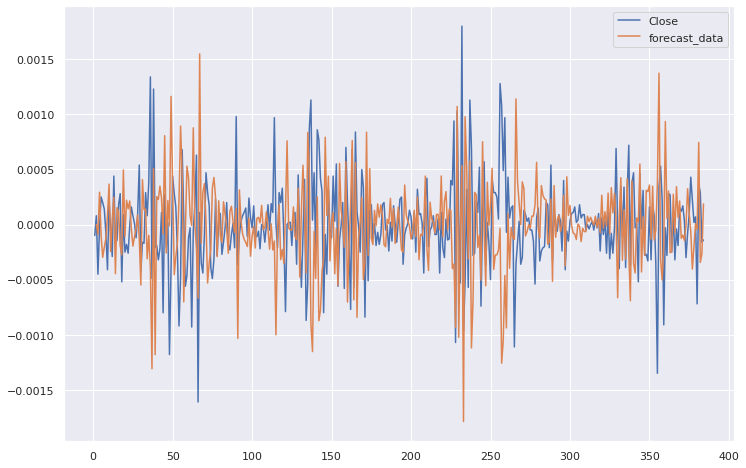

In [71]:
EURUSD['forecast_data'] = ARIMAresult_2.predict()  
EURUSD[['Close','forecast_data']]. plot (figsize= (12,8))

In [72]:
EURUSD

,Date,Open,High,Low,Close,Change(Pips),Change(%),20,200,forecast_data
0,2021-07-09 00:00:00,1.18466,1.18494,1.18449,NaN,0.7,0.01,NaN,NaN,NaN
1,2021-07-08 23:45:00,1.18471,1.18478,1.18459,-0.00010,-0.8,-0.01,NaN,NaN,NaN
2,2021-07-08 23:30:00,1.18438,1.18478,1.18436,0.00008,3.3,0.03,NaN,NaN,1.240021e-07
3,2021-07-08 23:15:00,1.18422,1.18426,1.18406,-0.00045,0.4,0.00,NaN,NaN,-8.981394e-05
4,2021-07-08 23:00:00,1.18454,1.18464,1.18415,-0.00002,-3.0,-0.03,NaN,NaN,2.935811e-04
...,...,...,...,...,...,...,...,...,...,...
380,2021-07-05 01:00:00,1.18571,1.18582,1.18536,-0.00072,-3.4,-0.03,1.185564,1.185179,-4.293976e-05
381,2021-07-05 00:45:00,1.18603,1.18605,1.18560,0.00037,-2.9,-0.02,1.185585,1.185197,7.451077e-04
382,2021-07-05 00:30:00,1.18590,1.18607,1.18571,0.00029,1.3,0.01,1.185607,1.185217,-3.438119e-04
383,2021-07-05 00:15:00,1.18576,1.18610,1.18574,-0.00016,1.1,0.01,1.185607,1.185234,-2.629580e-04


In [73]:

test_result_usdjpy = adfuller(USDJPY['Close'])
print ('ADF Test:')
labels = ['ADF Statistic','p-value','No. of Lags Used','Number of Observations Used']

for value,label in zip(test_result_usdjpy,labels):
    print (label+': '+str(value))
if test_result[1] <= 0.05:
    print ("Reject null hypothesis and data is stationary")
else:
    print ("Fail to reject H0 thereby data is non-stationary ")

ADF Test:
ADF Statistic: -1.2426176014328145
p-value: 0.654999430181481
No. of Lags Used: 0
Number of Observations Used: 384
Fail to reject H0 thereby data is non-stationary 


In [74]:
USDJPY['Close'] = USDJPY['Close'] - USDJPY['Close']. shift (1)
check_adf(USDJPY['Close'].dropna())

ADF Test:
ADF Statistic: -5.438928547289429
p-value: 2.8045530719942955e-06
No. of Lags Used: 13
Number of Observations Used: 370
Reject null hypothesis and data is stationary


In [75]:
model_usdjpy = ARIMA(USDJPY['Close'].dropna(),order=(0,1,1))
ARIMAresult_3 = model_usdjpy.fit()
print (ARIMAresult_3.summary())

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


                             ARIMA Model Results                              
Dep. Variable:                D.Close   No. Observations:                  383
Model:                 ARIMA(0, 1, 1)   Log Likelihood                 713.393
Method:                       css-mle   S.D. of innovations              0.037
Date:                Wed, 04 Aug 2021   AIC                          -1420.785
Time:                        12:28:01   BIC                          -1408.941
Sample:                             1   HQIC                         -1416.087
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const          -6.29e-06   1.72e-05     -0.366      0.714   -3.99e-05    2.73e-05
ma.L1.D.Close    -1.0000      0.008   -122.688      0.000      -1.016      -0.984
                                    Root

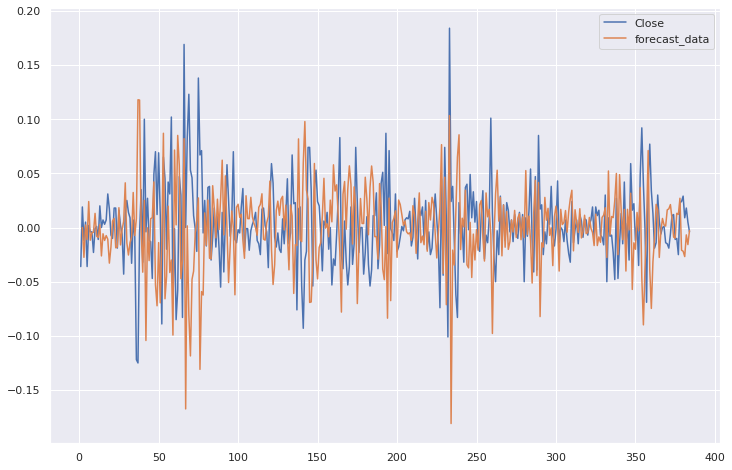

In [76]:
USDJPY['forecast_data'] = ARIMAresult_3.predict()  
USDJPY[['Close','forecast_data']]. plot (figsize= (12,8))

In [77]:
USDJPY

,Date,Open,High,Low,Close,Change(Pips),Change(%),20,200,forecast_data
0,2021-07-09 00:00:00,109.806,109.878,109.791,NaN,3.3,0.03,NaN,NaN,NaN
1,2021-07-08 23:45:00,109.826,109.845,109.778,-0.036,-2.3,-0.02,NaN,NaN,NaN
2,2021-07-08 23:30:00,109.818,109.833,109.807,0.019,0.4,0.00,NaN,NaN,-0.000006
3,2021-07-08 23:15:00,109.817,109.828,109.808,-0.012,-0.7,-0.01,NaN,NaN,-0.027509
4,2021-07-08 23:00:00,109.778,109.825,109.776,0.005,3.7,0.03,NaN,NaN,0.002321
...,...,...,...,...,...,...,...,...,...,...
380,2021-07-05 01:00:00,111.144,111.158,111.114,0.029,-1.1,-0.01,111.10805,110.819070,-0.021857
381,2021-07-05 00:45:00,111.163,111.190,111.110,0.009,-2.1,-0.02,111.10835,110.822050,-0.026793
382,2021-07-05 00:30:00,111.165,111.183,111.151,0.018,-0.5,0.00,111.11050,110.825290,-0.006781
383,2021-07-05 00:15:00,111.160,111.179,111.138,0.005,0.5,0.00,111.11360,110.828825,-0.015746
